In [15]:
#Standard Imports 
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame

In [16]:
#Stats 
from scipy import stats 

In [17]:
#Plotting imports 
import matplotlib as mlp 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
%matplotlib inline 

In [131]:
titanic_df = pd.read_csv('titanic_train.csv')

In [136]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


The above data is the first-five rows of the titanic data set. The data set presents: 
->PassengerID that beigns from 1 and runs to 891, 
->Survived column that indicates if the passenger survived or not by a binary value, 
->Pclass that indicates the class in which the passenger travelled, 
->Name indicates the name of the passenger, 
->the passenger's sex and age, 
->SibSp indicates if the passenger has any siblings, 
->Parch indicates if the passenger is with a parent or a child, 
->ticket number, fare, cabin number of the passenger, 
->embarked indicates different cities.  

In [137]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In this project, my data analysis will answer the following questions:
1. Who were the passenger on the titanic? (Ages, Gender, Class... etc)
2. What deck were the passengers on and how does that relate to their class? 
3. Where did the passenger come from ?
4. Who was alone and who was with family? 
5. What factors helped someone survive the sinking? 

Let us consider the first question for analysis. 
We will understand the sort of passengers on the titanic by indroducing factor plots on the data for different Genders, Classes and Ages.

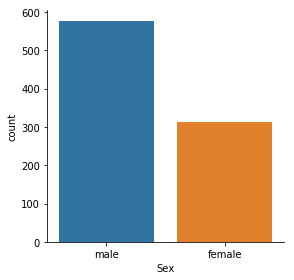

In [138]:
#Checking the number of passenger by their gender
sns.factorplot('Sex', data= titanic_df, kind= 'count')

It can be inferred, from the above graph, that there are more number of male passengers than female passengers.

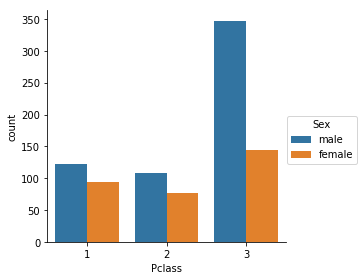

In [139]:
#Seperating the genders by classes, setting hue 
sns.factorplot('Pclass', data=titanic_df, hue = 'Sex', kind= 'count')

It can be inferred, from the above graph, that there are more number of male passengers in class 3 than others. 

In [140]:
def male_female_child(passenger):
    age, sex = passenger

    if age < 16: 
        return 'child';
    else: 
        return sex;

In [141]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis =1)

In [142]:
#Checking if this worked by caling for the first-ten rows of the dataset
titanic_df.head(n= 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,No,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Yes,child


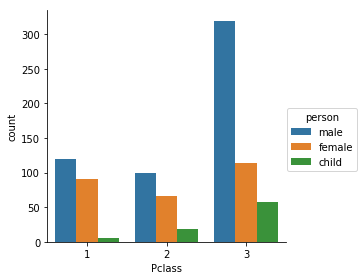

In [143]:
#Seperating the persons by classes, setting hue 
sns.factorplot('Pclass', data= titanic_df, hue = 'person', kind= 'count')

It can be inferred, from the above graph, that there are more number of children in class 3. 

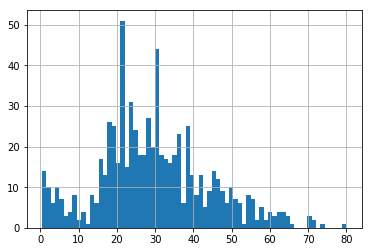

In [144]:
#Histograms using pandas 
titanic_df['Age'].hist(bins=70)

In [145]:
#Overall comparison of male, female, child 
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

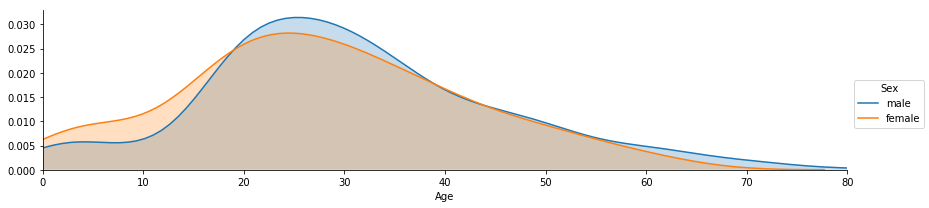

In [146]:
#Visuaizing distributions of age of different kind of passengers using multiple kde plots
fig = sns.FacetGrid(data = titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

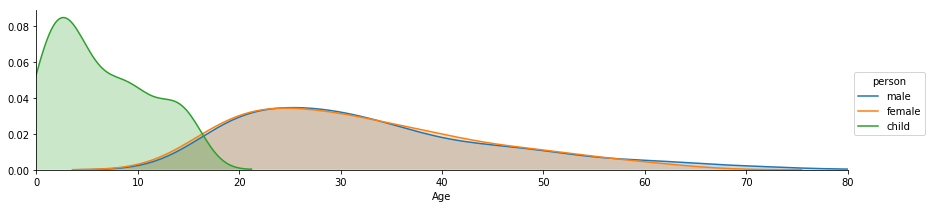

In [147]:
# Understanding a similar visualization by including different of persons
fig = sns.FacetGrid(data= titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim= (0, oldest))
fig.add_legend()

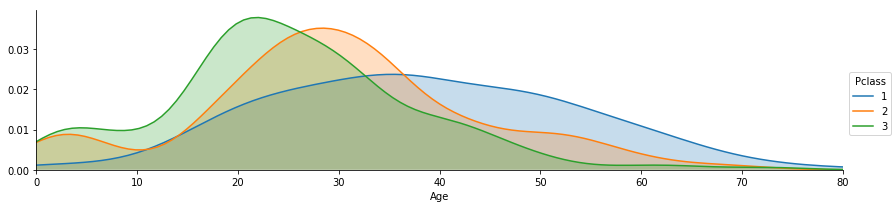

In [148]:
#Understanding a similar visualization by including passengers from different class
fig = sns.FacetGrid(data = titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade =True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

Moving on to our next question under research. We will explore what deck were the passengers and how does that relate to their class. 

In [149]:
# Quick look at the data set 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male


We can see that the cabin column has the information about deck. We will seperate this information from the rest.

In [150]:
#Let's eliminate NA values 
deck=titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [151]:
#Initializing an empty list 
levels = []
for level in deck:
    levels.append(level[0])
    

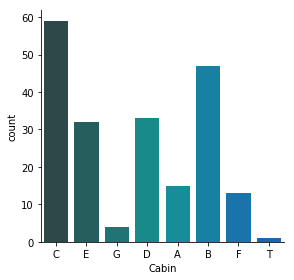

In [152]:
#Resetting the data frame and plotting 
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette= 'winter_d', kind = 'count')

Interestingly, the value count for T-deck is insignificant for our analysis and should be drop. 

In [153]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

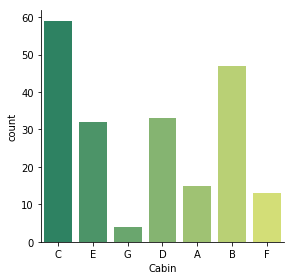

In [154]:
sns.factorplot('Cabin', data=cabin_df, palette= 'summer', kind= 'count')

Moving onto our next question, where did the passengers come from. 

In [155]:
#Quick look at our data set again. 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male


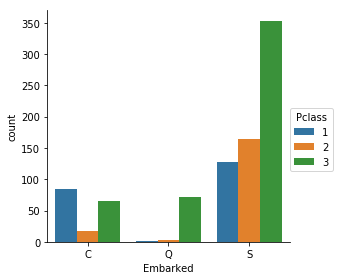

In [156]:
sns.factorplot('Embarked', data=titanic_df, hue = 'Pclass', kind = 'count', order=['C','Q','S'])

From the above visualization, we can understand that almost all passsengers who boarded from Queenstown were third class passengers.

Let us explore the next question, who was alone and who was with family.

In [157]:
#Quick look at the data 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male


The passengers were alone if both SibSp and Parch were both zero. 

In [158]:
# Combining both SibSp and Parch making a new column alone 

titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']


In [159]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [160]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [161]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male,Alone


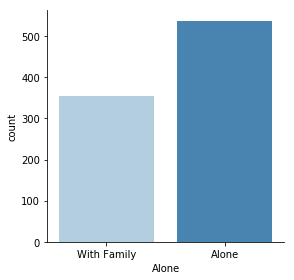

In [162]:
sns.factorplot('Alone', data = titanic_df, kind ='count', palette= 'Blues')

In [163]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1: 'Yes'})

In [164]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male,Alone


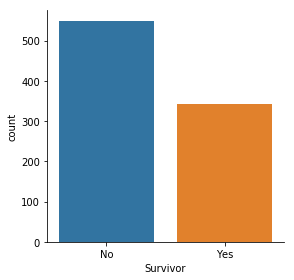

In [165]:
sns.factorplot('Survivor', data = titanic_df, kind = 'count')

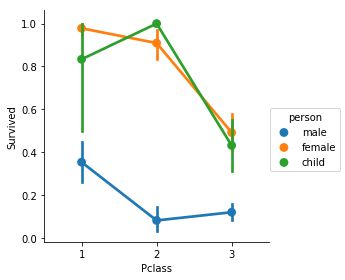

In [167]:
sns.factorplot('Pclass', 'Survived', data = titanic_df, hue = 'person')

From the above graph, it can be inferred that third class passengers had relatively less chances of surviving.

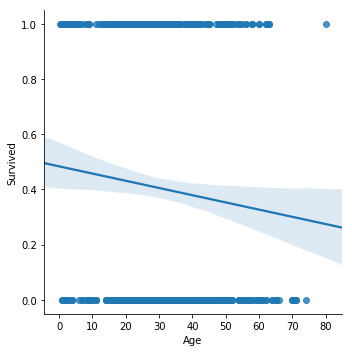

In [168]:
sns.lmplot('Age','Survived', data = titanic_df )

From the above graph, it can be inferred that people who are oldaged have relatively less chances of survival.

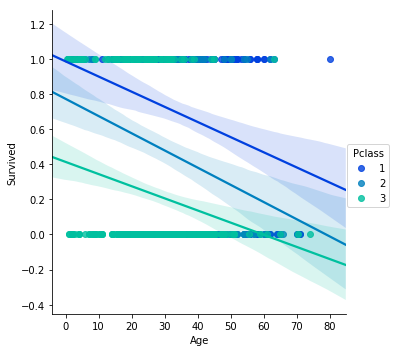

In [170]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass', palette= 'winter')

From the above graph, it can be inferred that  oldaged - third class passengers have raltively less chances of survival.

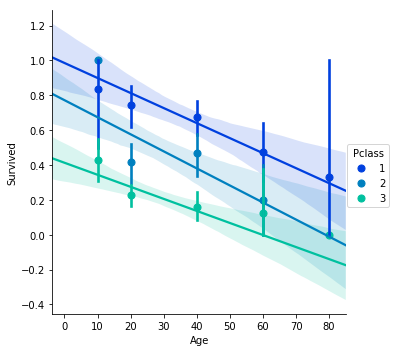

In [171]:
#Reducing the number of bins for better visualiztion
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette= 'winter', x_bins= generations)

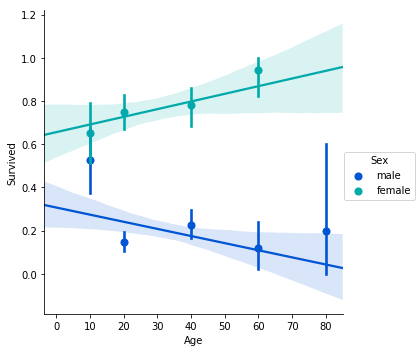

In [172]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette= 'winter', x_bins= generations)

From the above graph, we can infer that females have a better chances of surviving than males. 

Let us extended our analysis to further understand if the deck had effect on the passengers survival rate. 

In [176]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male,Alone


In [190]:
titanic_df1 = titanic_df[['Survived', 'Cabin']]

In [192]:
titanic_df1.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [214]:
#Alternately we could use this 
titanic_df2 = DataFrame([],[titanic_df.Survived, titanic_df.Cabin])
titanic_df2.reset_index(inplace= True)
titanic_df2.head()


,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [222]:
#Eliminating Null values
titanic_df1.dropna(axis=0,inplace = True)

C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [223]:
titanic_df1['Levels'] = levels

C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
titanic_df1.head()

,Survived,Cabin,Levels
1,1,C85,C
3,1,C123,C
6,0,E46,E
10,1,G6,G
11,1,C103,C


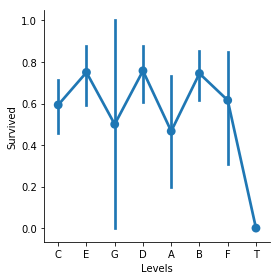

In [225]:
sns.factorplot('Levels', 'Survived', data = titanic_df1)

From the above graph, we can interpret that passengers on deck: E, D, & B have relatively better chances of surviving. We can also infer that deck did have an impact on the survival rate of the passengers,as observed from the variations in the survival rate associated with different decks.

However, the above data has been constructed by eliminating 75% of the overall dataset. This cannot be used to make confident interpretations on the data. 

Let us extend this analysis to understand if having a family mmber increased the odds of surviving the crash.

In [226]:
titanic_df3 = titanic_df[['Survived', 'Alone']]

In [227]:
titanic_df3.head()

,Survived,Alone
0,0,With Family
1,1,With Family
2,1,Alone
3,1,With Family
4,0,Alone


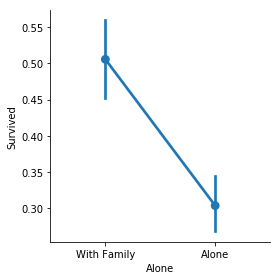

In [228]:
sns.factorplot('Alone', 'Survived', data= titanic_df3)

From the above graphs, it is certain that passengers with a family had better chances of survival than passengers who travelled alone.